# Imports

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
# from src.utils import plot_genre_distribution

# IPython Magic Functions
# will make plot outputs appear and be stored within the notebook.
%matplotlib inline 

# Turn on interactive mode
sns.set_theme()
plt.rcParams['figure.figsize']  = (11.7, 8.27)

# Loading datasets into Dataframes

In [73]:
dataset_name = "music4all"
dataset_relative_location = "../../dataset"

dataset_path = Path(dataset_relative_location) / dataset_name

### Get datset CSVs
csvsPattern = "*.csv"
csvs = list(dataset_path.glob(csvsPattern))
csvs

datasets = {}

for csv in csvs:
    datasets[csv.stem] = pd.read_csv(csv, delimiter="\t")

# Taking a look at the datasets we have
datasets.keys()

dict_keys(['id_tags', 'id_metadata', 'id_information', 'listening_history', 'id_lang', 'id_genres'])

## Loading Processed Dataframe

In [74]:
dataset_size = 109178
feat_type = "transfer_learning"

DATASETS_FOLDER = Path("../code/dataset")
DATAFRAME_PATH = DATASETS_FOLDER / "cleaned_datasets" 
DF_FILENAME = f"cleaned_song_info_{dataset_size}_entries.csv"

dataframe = pd.read_csv(DATAFRAME_PATH / DF_FILENAME)
print(f"columns: {dataframe.columns}\nsize: {len(dataframe)}")

columns: Index(['id', 'artist', 'song', 'album_name', 'genres', 'spotify_id',
       'popularity', 'release', 'danceability', 'energy', 'key', 'mode',
       'valence', 'tempo', 'duration_ms'],
      dtype='object')
size: 109178


# How many artists, songs and albuns do we have in the dataset ?

### Merging the datasets in one that has meaningfull song information

In [75]:
song_info = pd.merge(datasets['id_information'], datasets['id_genres'], on='id')
song_info = pd.merge(song_info, datasets['id_metadata'], on='id') # has release date info
song_info.describe()

,popularity,release,danceability,energy,key,mode,valence,tempo,duration_ms
count,109269.000000,109269.000000,109269.000000,109269.000000,109269.000000,109269.000000,109269.000000,109269.000000,1.092690e+05
mean,35.080608,2005.813488,0.520449,0.667162,5.284079,0.624669,0.445504,122.753032,2.425046e+05
std,14.756258,14.335056,0.173008,0.241372,3.560797,0.484210,0.252159,28.997936,1.003360e+05
min,0.000000,1013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.229000e+03
25%,25.000000,2001.000000,0.403000,0.502000,2.000000,0.000000,0.236000,100.194000,1.934810e+05
50%,34.000000,2011.000000,0.528000,0.712000,5.000000,1.000000,0.424000,121.079000,2.275330e+05
75%,45.000000,2016.000000,0.645000,0.872000,9.000000,1.000000,0.639000,140.047000,2.715330e+05
max,95.000000,2019.000000,0.988000,1.000000,11.000000,1.000000,0.998000,242.903000,4.995315e+06


# What is the genre distribution ?

Number of unique genres in the dataset: 853


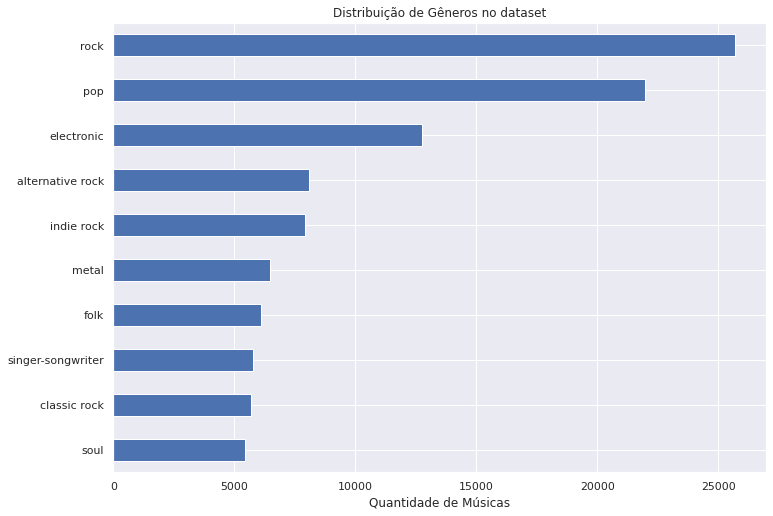

In [76]:
def plot_genre_distribution(df, most_popular=10):
    """ Plots the genre distribution of the most popular genres in the dataframe
    - Needs a genre column in the dataframe
    """
    
    # Join all the genres in a string and the split them
    genres = ",".join(df['genres']).split(",")
    
    # That way we can count the occurrences of all genres in the dataframe
    genres_series = pd.Series(genres)
    print(f"Number of unique genres in the dataset: {genres_series.nunique()}")
    
    genres_count = genres_series.value_counts()
    fig = genres_count[:most_popular].plot.barh(title="Distribuição de Gêneros no dataset")
    fig.invert_yaxis()
    ax = fig.figure.gca()
    ax.set(xlabel="Quantidade de Músicas")
    fig.figure.savefig("images/Gêneros no Dataset.png")
    

plot_genre_distribution(dataframe)

We have less songs/albuns/artists than ids because there are songs, albuns and artists with the same name

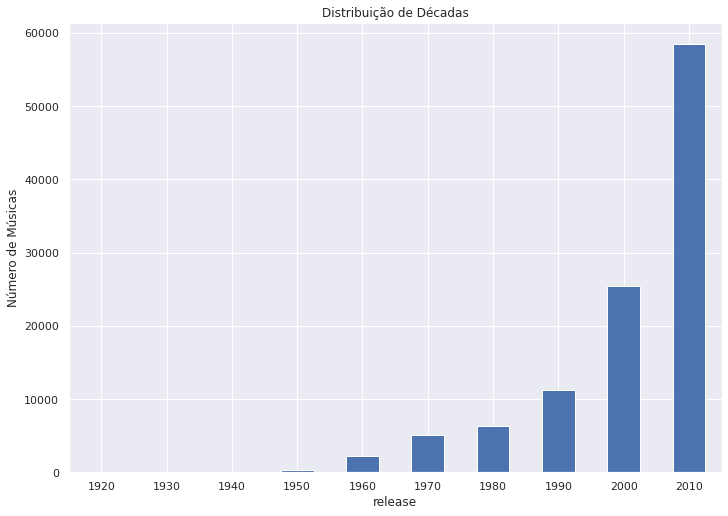

In [77]:
fig = dataframe.groupby((dataframe.release//10)*10).count()["song"].plot.bar() \
    .set_title("Distribuição de Décadas") \
    .get_figure()
ax = fig.gca()

ax.set(ylabel="Número de Músicas")
ax.tick_params(axis='x', rotation=0)

fig.savefig("images/Distribuição de Décadas.png")

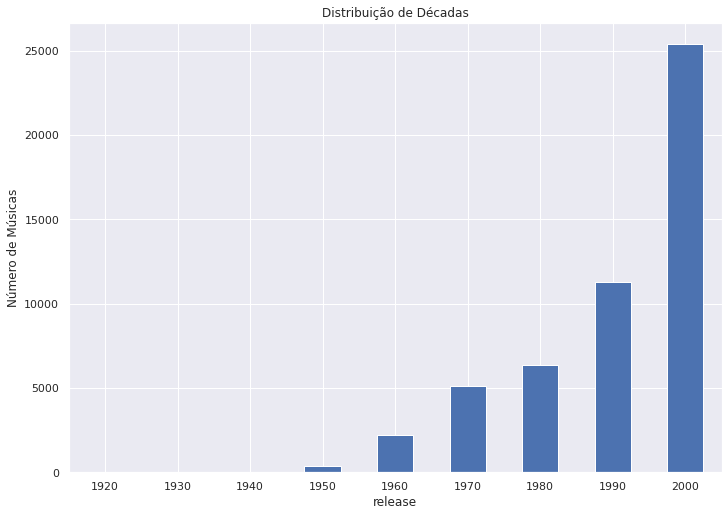

In [78]:
fig = dataframe.groupby((dataframe.release//10)*10).count()["song"][:-1].plot.bar() \
    .set_title("Distribuição de Décadas") \
    .get_figure()
ax = fig.gca()

ax.set(ylabel="Número de Músicas")
ax.tick_params(axis='x', rotation=0)

fig.savefig("images/Distribuição de Décadas Até 2000.png")

id            109269
artist         16269
song           87915
album_name     38363
dtype: int64

Songs: 109269
Artists: 16269
Albuns: 38363


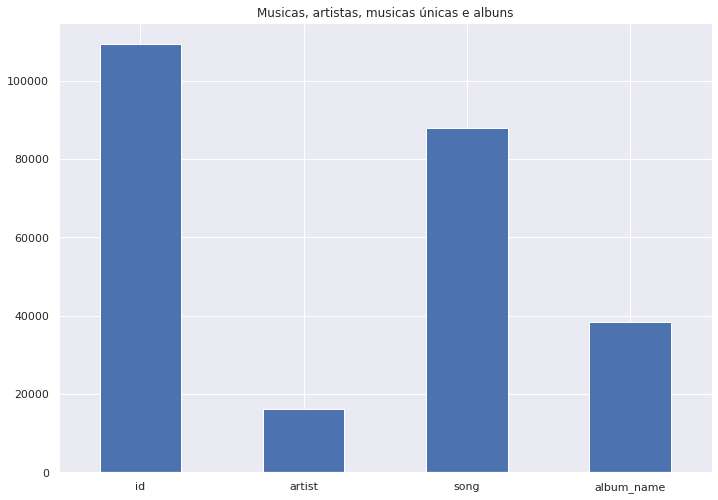

In [79]:
df_info = datasets["id_information"]
unique = df_info.nunique()

print(unique)
print(f"\nSongs: {unique[0]}\nArtists: {unique[1]}\nAlbuns: {unique[3]}")
fig = unique.plot.bar(title="Musicas, artistas, musicas únicas e albuns") \
    .get_figure()
ax = fig.gca()
ax.tick_params(axis='x', rotation=0)
fig.savefig("images/Musicas, artistas, musicas únicas e albuns.png")

In [40]:
genres_df = datasets["id_genres"].copy(deep=True)
genres = ",".join(genres_df['genres']).split(",")
genres[:10]

['pop',
 'underground hip hop',
 'hard rock',
 'rock',
 'classic rock',
 'symphonic metal',
 'power metal',
 'symphonic power metal',
 'post-punk',
 'new wave']

In [41]:
# Get the the series as dataframe to count the values
genres_count = pd.Series(genres).value_counts()

# Get the first 100 most common
most_common_genres = genres_count[:100]
most_common_genres

rock                25731
pop                 22013
electronic          12769
alternative rock     8103
indie rock           7943
                    ...  
christian rock        350
drone                 346
avant-garde           343
mathcore              337
grindcore             334
Length: 100, dtype: int64

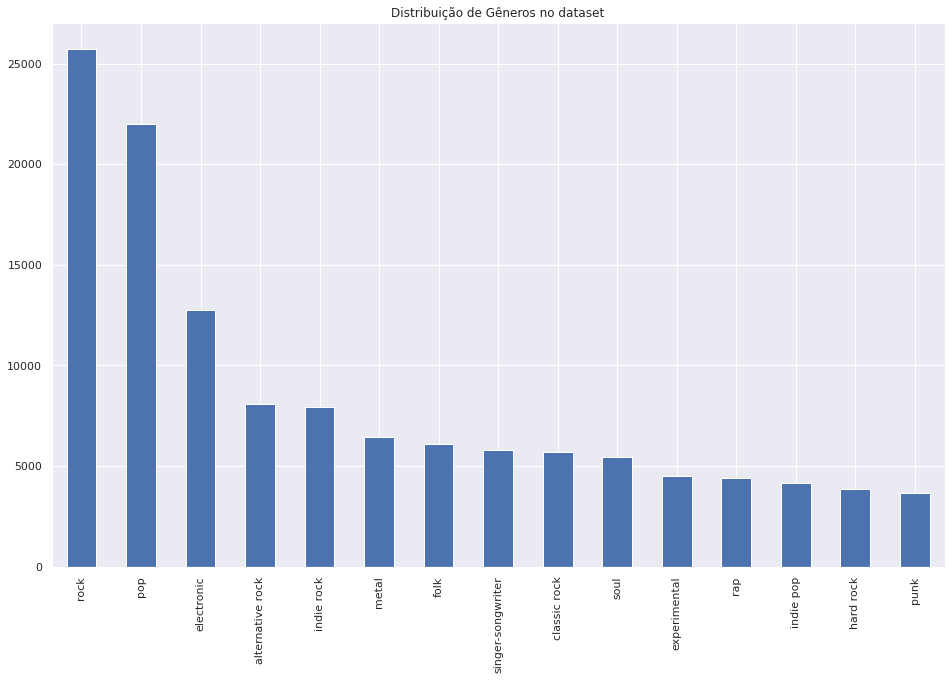

In [42]:
ax = most_common_genres[:15].plot.bar(title="Distribuição de Gêneros no dataset")

# Qual a distribuição das tags ?

In [65]:
# Getting the tags
tags_df = datasets["id_tags"].copy(deep=True)

# Counting the tags
tags = ",".join(tags_df['tags']).split(",")
tags_count = pd.Series(tags).value_counts()

# Getting the most common tags in the dataset
most_common_tags = tags_count[:100]
most_common_tags

rock              25731
pop               22013
indie             17539
alternative       13114
electronic        12769
                  ...  
downtempo           936
trap                917
male vocalists      881
garage rock         878
nu metal            856
Length: 100, dtype: int64

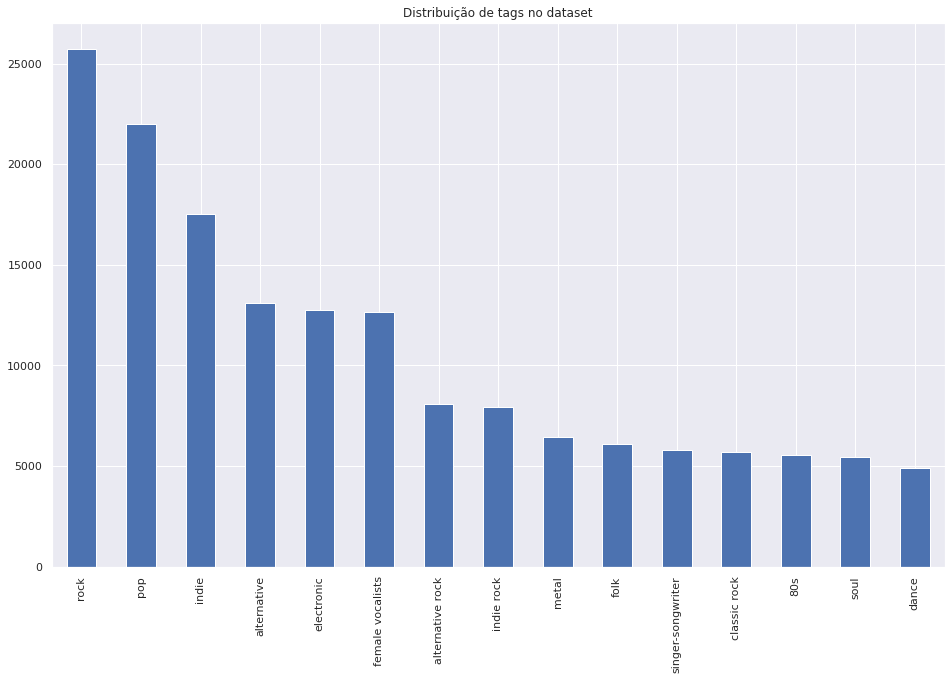

In [66]:
ax = most_common_tags[:15].plot.bar(title="Distribuição de tags no dataset")

# Taking a look at the listening history of the users

In [8]:
datasets['listening_history'].describe()

,user,song,timestamp
count,5109592,5109592,5109592
unique,14127,99596,122340
top,user_dndf78il,32m5suoC94ytD8Ed,2019-02-08 20:35
freq,500,82871,175


In [14]:
listening_history = datasets['listening_history']
listening_history

,user,song,timestamp
0,user_007XIjOr,DaTQ53TUmfP93FSr,2019-02-20 12:28
1,user_007XIjOr,dGeyvi5WCOjDU7da,2019-02-20 12:35
2,user_007XIjOr,qUm54NYOjeFhmKYx,2019-02-20 12:48
3,user_007XIjOr,FtnuMT1DlevSR2n5,2019-02-20 12:52
4,user_007XIjOr,LHETTZcSZLeaVOGh,2019-02-20 13:09
...,...,...,...
5109587,user_zzWscYTy,BBiswLufo26YQCT7,2019-01-10 15:57
5109588,user_zzWscYTy,5ZHgff3sjETIiedr,2019-01-10 16:21
5109589,user_zzWscYTy,m4O1iLh6fC43xjRy,2019-01-10 16:48
5109590,user_zzWscYTy,mvUaP8k67qOFfA65,2019-01-10 21:13


# Selecting one user to check its listening history to see what it is like

In [15]:
some_user = lh[lh["user"] == "user_007XIjOr"]
some_user

,user,song,timestamp
0,user_007XIjOr,DaTQ53TUmfP93FSr,2019-02-20 12:28
1,user_007XIjOr,dGeyvi5WCOjDU7da,2019-02-20 12:35
2,user_007XIjOr,qUm54NYOjeFhmKYx,2019-02-20 12:48
3,user_007XIjOr,FtnuMT1DlevSR2n5,2019-02-20 12:52
4,user_007XIjOr,LHETTZcSZLeaVOGh,2019-02-20 13:09
...,...,...,...
435,user_007XIjOr,1gEApUktf4hN25zC,2019-03-05 23:14
436,user_007XIjOr,LxpGP4Ys3MgvhqRZ,2019-03-05 23:32
437,user_007XIjOr,LxpGP4Ys3MgvhqRZ,2019-03-05 23:32
438,user_007XIjOr,LxpGP4Ys3MgvhqRZ,2019-03-05 23:38


In [22]:
## Ranaming column to make a merge
renamed_df = some_user.rename(columns = {'song':'id'})
some_user_songs = pd.merge(renamed_df, song_info, on='id')
some_user_songs

,user,id,timestamp,artist,song,album_name,genres
0,user_007XIjOr,DaTQ53TUmfP93FSr,2019-02-20 12:28,Mitski,Your Best American Girl,Puberty 2,"indie rock,noise pop,indie rock,dream pop"
1,user_007XIjOr,DaTQ53TUmfP93FSr,2019-02-26 18:09,Mitski,Your Best American Girl,Puberty 2,"indie rock,noise pop,indie rock,dream pop"
2,user_007XIjOr,dGeyvi5WCOjDU7da,2019-02-20 12:35,ionnalee,LIKE HELL,EVERYONE AFRAID TO BE FORGOTTEN,"synthpop,art pop,downtempo"
3,user_007XIjOr,dGeyvi5WCOjDU7da,2019-02-25 13:25,ionnalee,LIKE HELL,EVERYONE AFRAID TO BE FORGOTTEN,"synthpop,art pop,downtempo"
4,user_007XIjOr,dGeyvi5WCOjDU7da,2019-02-28 23:25,ionnalee,LIKE HELL,EVERYONE AFRAID TO BE FORGOTTEN,"synthpop,art pop,downtempo"
...,...,...,...,...,...,...,...
435,user_007XIjOr,0jx1O7OwEExV2q1y,2019-03-05 22:44,Sufjan Stevens,I Walked,The Age of Adz,"singer-songwriter,electronic,experimental,elec..."
436,user_007XIjOr,0jx1O7OwEExV2q1y,2019-03-05 22:49,Sufjan Stevens,I Walked,The Age of Adz,"singer-songwriter,electronic,experimental,elec..."
437,user_007XIjOr,LxpGP4Ys3MgvhqRZ,2019-03-05 23:32,Julia Holter,Maxim's II,Loud City Song,experimental
438,user_007XIjOr,LxpGP4Ys3MgvhqRZ,2019-03-05 23:32,Julia Holter,Maxim's II,Loud City Song,experimental


In [24]:
def get_transition_timestamps(df):
    list_of_lists = []
    
    # first row is a transition to itself, # source, # target, # timestamp
    list_of_lists.append([df.loc[0, "song"], df.loc[0, "song"],  df.loc[0, "timestamp"]])

    # from 0 to n-1
    for i in range(0, len(df) - 1) :
        list_of_lists.append([df.loc[i, "song"], df.loc[i + 1, "song"],  df.loc[i + 1, "timestamp"]])

    return list_of_lists    

def get_transition_df(transition_ts):
    return pd.DataFrame(transition_ts, columns=["source", "target", "timestamp"])

# Get the listening history of the user as a dataset that every line is a transition
transition_ts = get_transition_timestamps(some_user_songs)

# Making into a dataframe 
transitions = pd.DataFrame(transition_ts, columns=["source", "target", "timestamp"])
transitions

,source,target,timestamp
0,Your Best American Girl,Your Best American Girl,2019-02-20 12:28
1,Your Best American Girl,Your Best American Girl,2019-02-26 18:09
2,Your Best American Girl,LIKE HELL,2019-02-20 12:35
3,LIKE HELL,LIKE HELL,2019-02-25 13:25
4,LIKE HELL,LIKE HELL,2019-02-28 23:25
...,...,...,...
435,Abbey,I Walked,2019-03-05 22:44
436,I Walked,I Walked,2019-03-05 22:49
437,I Walked,Maxim's II,2019-03-05 23:32
438,Maxim's II,Maxim's II,2019-03-05 23:32
